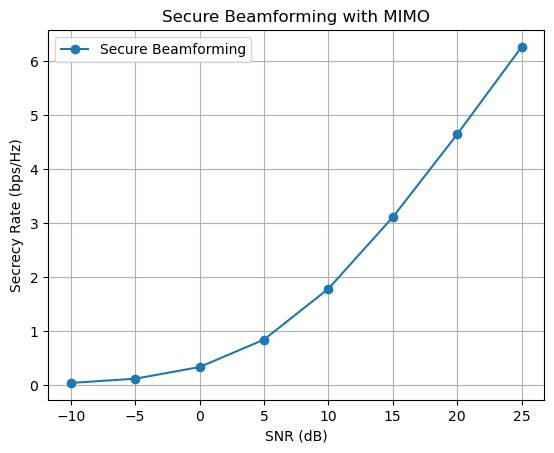

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Nt = 4  # Number of transmit antennas
Nr = 2  # Number of receive antennas (Bob)
Ne = 2  # Number of eavesdropper antennas (Eve)
SNR_dB = np.arange(-10, 30, 5)  # SNR range in dB

# Generate random MIMO channels
H_bob = np.random.randn(Nr, Nt) / np.sqrt(2)  # Legitimate user channel
H_eve = np.random.randn(Ne, Nt) / np.sqrt(2)  # Eavesdropper channel

# Zero-Forcing Beamforming (ZFBF) for Bob
U, S, Vh = np.linalg.svd(H_bob)  # SVD decomposition
W_bob = Vh.conj().T[:, :Nr]  # Beamforming matrix for Bob

# Artificial Noise (AN) Generation
null_space = Vh.conj().T[:, Nr:]  # Null space of Bob’s channel
power_allocation = 0.7  # Fraction of power for signal (rest for AN)

# Compute Secrecy Capacity
secrecy_rates = []
for snr_db in SNR_dB:
    snr = 10 ** (snr_db / 10)
    signal_power = power_allocation * snr
    noise_power = (1 - power_allocation) * snr
    
    signal_bob = np.linalg.norm(H_bob @ W_bob) ** 2 * signal_power
    noise_bob = Nr  # Assume normalized noise variance
    rate_bob = np.log2(1 + signal_bob / noise_bob)
    
    # Eavesdropper received power
    signal_eve = np.linalg.norm(H_eve @ W_bob) ** 2 * signal_power
    noise_eve = np.linalg.norm(H_eve @ null_space) ** 2 * noise_power + Ne
    rate_eve = np.log2(1 + signal_eve / noise_eve)
    
    secrecy_rate = max(rate_bob - rate_eve, 0)  # Ensure non-negative secrecy rate
    secrecy_rates.append(secrecy_rate)

# Plot Secrecy Rate vs. SNR
plt.plot(SNR_dB, secrecy_rates, marker='o', label='Secure Beamforming')
plt.xlabel("SNR (dB)")
plt.ylabel("Secrecy Rate (bps/Hz)")
plt.title("Secure Beamforming with MIMO")
plt.legend()
plt.grid()
plt.show()
